In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import statsmodels.api as sm

## Part a

In [3]:
# read in data
# note: add column name "Date" to the first column, removed irrelevant information on the top,
#       industry porfolios are value weighted
data1 = pd.read_csv('F-F_Research_Data_Factors.csv',skiprows = 3,index_col= 0)[534:1134].astype('float')
data2 = pd.read_csv('30_Industry_Portfolios.csv',skiprows = 11,index_col= 0)[534:1134].astype('float')

In [4]:
# full sample from 01/1971 to 12/2020
data1
index_start = data1.index[data1["Date"] == "197101"][0]
index_end = data1.index[data1["Date"] == "202012"][0] + 1
data1 = data1[index_start:index_end].reset_index(drop = True)
index_start = data2.index[data2["Date"] == "197101"][0]
index_end = data2.index[data2["Date"] == "202012"][0] + 1
data2 = data2[index_start:index_end].reset_index(drop = True)

KeyError: 'Date'

In [57]:
# convert portfolio returns to excess returns
for index, row in data2.iterrows():
    rf = float(data1.iloc[index, 4])
    data2.iloc[index, 1:] = np.array(row[1:], dtype = "float") - rf

In [31]:
data1

,Date,Mkt-RF,SMB,HML,RF
0,197101,4.84,7.37,1.33,0.38
1,197102,1.41,1.86,-1.22,0.33
2,197103,4.13,2.5,-4.06,0.3
3,197104,3.15,-0.5,0.71,0.28
4,197105,-3.98,-1.11,-1.48,0.29
...,...,...,...,...,...
595,202008,7.63,-0.25,-2.94,0.01
596,202009,-3.63,0.06,-2.51,0.01
597,202010,-2.1,4.44,4.03,0.01
598,202011,12.47,5.48,2.11,0.01


In [60]:
data2

,Date,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,197101,2.35,4.13,5.37,11.18,5.21,4.77,12.25,4.54,6.62,...,9.37,8.23,4.95,5.04,15.45,13.56,7.48,6.67,4.87,13.81
1,197102,2.03,1.33,4.74,5.56,6.78,1.36,5.72,0.98,1.46,...,-5.63,3.4,2.42,1.89,2.43,1.55,3.27,6.06,1.52,2.49
2,197103,3.79,2.36,9.31,10.82,4.17,6.06,3.99,3.38,2.87,...,0.43,7.4,7.8,4.11,2.74,8.88,6.03,8.79,6.87,1.56
3,197104,1.48,1.22,1.45,6.45,5.12,3.54,2.54,3.95,6.16,...,0.54,2.08,2.01,2.61,11.33,1.32,5.27,2.95,2.01,6.42
4,197105,-1.8,-1.98,-8,-1.12,-6.63,-1.36,-4.39,-2.42,-1.13,...,-5.5,-4.21,-6.52,-2.93,-3.96,-3.39,-2.25,0.79,-5.69,-7.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,202008,4.02,2.64,4.76,11.47,3.59,4.83,12.2,2.76,5.12,...,5.44,9.31,12.05,6.55,13.03,4.94,8.13,12.3,4.96,9.93
596,202009,-2.7,0.24,-6.56,-2.39,-4.41,-0.67,6.39,-1.52,1.01,...,-2.21,-4.94,-5.33,-0.24,1.33,-2.09,-4.57,-0.79,-4.09,-1.61
597,202010,-2.52,-4.44,-5.69,-2.37,-6.28,-0.55,-1.81,-4.3,-0.13,...,-3.91,-0.89,-3.54,0.24,-3.5,-0.45,-2.92,-0.85,-1.08,-4.12
598,202011,8.27,10.87,8.04,13.46,22.93,5.79,14.26,9.62,12.46,...,14.43,10.43,12.18,9.73,17.09,15.32,7.56,11.29,16.25,14.6


## Part b

In [43]:
# fit market models to each of the 30 portfolios
alpha = []
beta = []

X = data1["Mkt-RF"]
X = np.array(X,dtype = "float")
X = sm.add_constant(X)

for col in data2.columns[1:]:
    Y = data2[col]
    Y = np.array(Y, dtype = "float")
    model = sm.OLS(Y, X)
    results = model.fit()
    alpha.append(results.params[0])
    beta.append(results.params[1])
    
marketmodel_result = pd.DataFrame({"industry": data2.columns[1:], "alpha": alpha, "beta": beta})

In [44]:
# sort by beta
marketmodel_result = marketmodel_result.sort_values("beta").reset_index(drop = True)
marketmodel_result

,industry,alpha,beta
0,Util,0.220446,0.492141
1,Smoke,0.571299,0.659917
2,Food,0.278452,0.687529
3,Beer,0.333858,0.737711
4,Hshld,0.060484,0.782163
5,Telcm,0.118772,0.795515
6,Hlth,0.203204,0.815883
7,Oil,0.033536,0.879818
8,Paper,0.006104,0.936142
9,Mines,-0.046975,0.948131


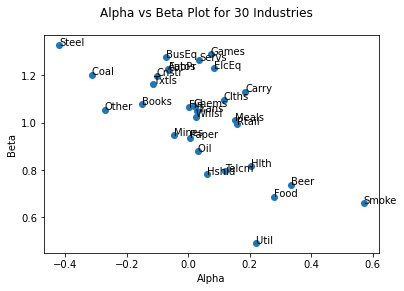

In [45]:
# plot alpha and beta for the 30 industries
fig = plt.figure()
fig.suptitle("Alpha vs Beta Plot for 30 Industries")
plt.xlabel("Alpha")
plt.ylabel("Beta")
X = marketmodel_result["alpha"]
Y = marketmodel_result["beta"]
plt.scatter(X, Y)
for i, txt in enumerate(marketmodel_result["industry"]):
    plt.annotate(txt, (X[i], Y[i]))
plt.show()

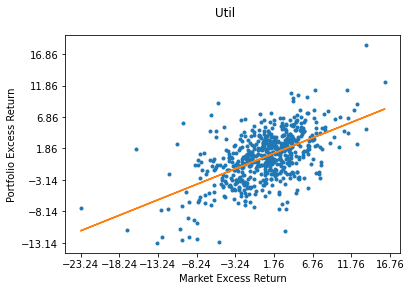

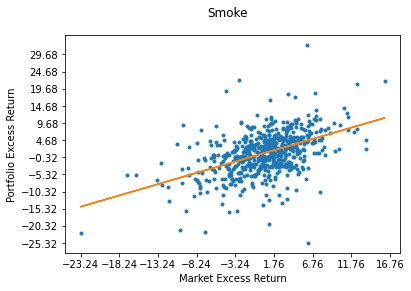

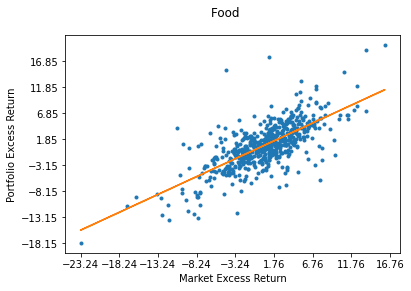

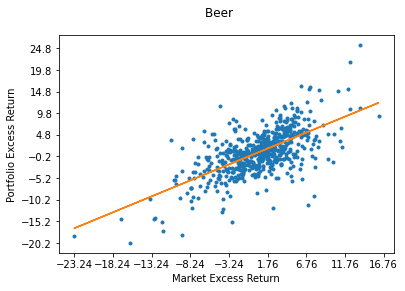

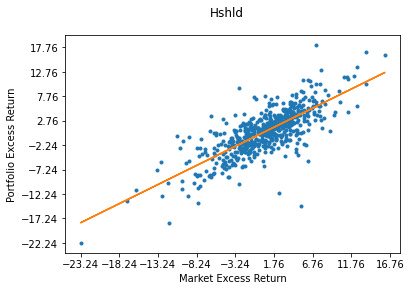

In [11]:
# plot regression for bottom 5
for index, row in marketmodel_result.iloc[:5].iterrows():
    fig = plt.figure()
    fig.suptitle(row["industry"])
    plt.xlabel("Market Excess Return")
    plt.ylabel("Portfolio Excess Return")
    X = data1["Mkt-RF"]
    X = np.array(X,dtype = "float")
    Y = data2[row["industry"]]
    Y = np.array(Y,dtype = "float")
    plt.xticks(np.arange(min(X), max(X)+1, 5))
    plt.yticks(np.arange(min(Y), max(Y)+1, 5))
    plt.plot(X, Y, ".")
    plt.plot(X, X * row["beta"] + row["alpha"])
    plt.show()

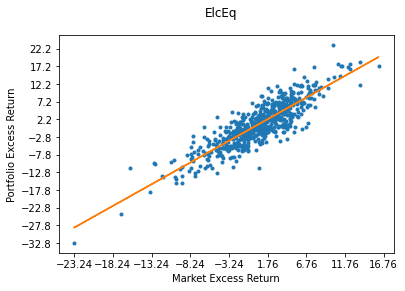

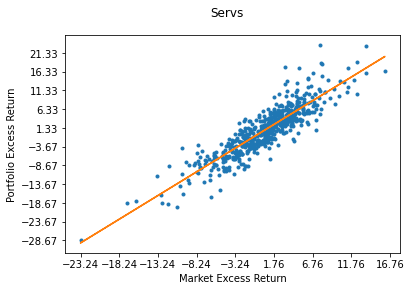

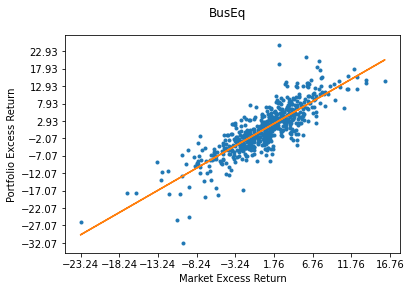

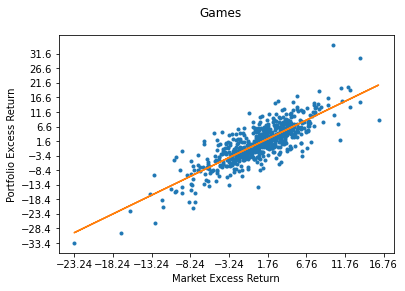

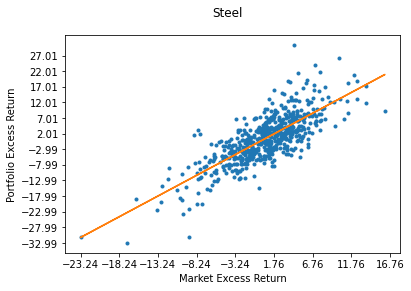

In [12]:
# plot regression for top 5
for index, row in marketmodel_result.iloc[-5:].iterrows():
    fig = plt.figure()
    fig.suptitle(row["industry"])
    plt.xlabel("Market Excess Return")
    plt.ylabel("Portfolio Excess Return")
    X = data1["Mkt-RF"]
    X = np.array(X,dtype = "float")
    Y = data2[row["industry"]]
    Y = np.array(Y,dtype = "float")
    plt.xticks(np.arange(min(X), max(X)+1, 5))
    plt.yticks(np.arange(min(Y), max(Y)+1, 5))
    plt.plot(X, Y, ".")
    plt.plot(X, X * row["beta"] + row["alpha"])
    plt.show()

## Part c

In [69]:
# create beta matrix
beta_matrix = data2.copy()
beta_matrix = beta_matrix.iloc[120:]
for col in beta_matrix.columns[1:]:
    beta_matrix[col].values[:] = 0

#beta_matrix = beta_matrix.append(pd.Series(0, index=beta_matrix.columns), ignore_index=True)
#beta_matrix.loc[480, "Date"] = "202101"

beta_matrix = beta_matrix.reset_index(drop = True)

beta_matrix

,Date,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,198101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,198102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,198103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,198104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,198105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,202008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476,202009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,202010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,202011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# update the matrix with rolling window
for index in range(119, 599):
    
    X = data1["Mkt-RF"][(index - 60):index]
    X = np.array(X,dtype = "float")
    X = sm.add_constant(X)
    
    for col in data2.columns[1:]:
        
        Y = data2[col][(index - 60):index]
        Y = np.array(Y, dtype = "float")
        model = sm.OLS(Y, X)
        results = model.fit()
        
        beta_matrix.loc[index - 119, col] = results.params[1]
        
beta_matrix

,Date,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,198101,0.738681,1.11491,0.619423,1.34156,1.05735,0.930231,1.05594,0.878322,1.10061,...,0.397504,1.29874,1.15121,1.00083,1.23276,1.10977,0.898646,1.22612,0.970351,1.15605
1,198102,0.711366,1.11834,0.610187,1.33406,1.03831,0.91399,1.04828,0.834144,1.09414,...,0.391604,1.29516,1.13969,0.995136,1.24648,1.12846,0.87752,1.20511,0.943981,1.149
2,198103,0.691846,1.04169,0.614063,1.28645,0.99945,0.878143,0.892517,0.852681,0.992976,...,0.312676,1.30645,1.11436,0.914568,1.22464,1.10524,0.879473,1.19283,0.938146,1.18048
3,198104,0.691229,1.04206,0.613815,1.28692,0.999629,0.878287,0.893219,0.851511,0.993554,...,0.31326,1.30717,1.11442,0.915336,1.22564,1.10613,0.880351,1.19394,0.938332,1.18088
4,198105,0.702552,1.05503,0.620747,1.3143,1.01537,0.874298,0.900387,0.849297,0.99836,...,0.310964,1.3266,1.11329,0.918635,1.25151,1.13141,0.903315,1.2084,0.943384,1.18519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,202008,0.582759,0.602659,0.521838,1.25302,1.22578,0.595345,1.00842,0.844234,1.29191,...,0.780028,1.01546,1.08557,0.934994,1.14892,1.0982,0.931036,0.91405,1.13694,0.77002
476,202009,0.593498,0.609278,0.537104,1.24584,1.22463,0.611686,0.984827,0.841712,1.29734,...,0.783149,1.00832,1.09658,0.919387,1.15208,1.09979,0.947498,0.908638,1.11937,0.775222
477,202010,0.587756,0.59945,0.538732,1.25499,1.20268,0.589784,1.02603,0.804377,1.2829,...,0.760985,1.01355,1.10931,0.9218,1.18426,1.10187,0.948527,0.932131,1.10509,0.798066
478,202011,0.592087,0.60542,0.570963,1.22521,1.19646,0.588606,1.00094,0.781889,1.24485,...,0.757756,1.02464,1.12085,0.909839,1.17192,1.08483,0.957402,0.933421,1.10588,0.794831


In [71]:
# create cyclical and defensive sector index
cyclical_index = []
defensive_index = []

for index, row in beta_matrix.iterrows():
    
    row = np.array(row[1:], dtype = "float")
    defensive_indices = row.argsort()[:5]
    defensive_indices = np.array(defensive_indices) + 1
    cyclical_indices = (-row).argsort()[:5]
    cyclical_indices = np.array(cyclical_indices) + 1
    
    defensive_index.append(np.mean(data2.iloc[index + 120, defensive_indices]))
    cyclical_index.append(np.mean(data2.iloc[index + 120, cyclical_indices]))
        
partc_res = pd.DataFrame({"Date": beta_matrix["Date"], "Cyclical Sector Index": cyclical_index, 
                          "Defensive Sector Index": defensive_index})

partc_res

,Date,Cyclical Sector Index,Defensive Sector Index
0,198101,-5.236,-0.544
1,198102,-0.546,0.576
2,198103,8.198,3.662
3,198104,-0.976,0.180
4,198105,0.492,2.178
...,...,...,...
475,202008,14.864,2.798
476,202009,-5.462,-1.994
477,202010,-0.024,-1.744
478,202011,24.108,7.118


In [73]:
# average excess return
print(np.mean(partc_res["Cyclical Sector Index"]))
print(np.mean(partc_res["Defensive Sector Index"]))

0.793791666666667
0.7200500000000007


In [99]:
# market alpha and beta for cyclical sector index
X = data1.loc[120:, "Mkt-RF"]
X = np.array(X,dtype = "float") / 100
X = sm.add_constant(X)

Y = partc_res["Cyclical Sector Index"]
Y = np.array(Y, dtype = "float") / 100
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1914.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.07e-169
Time:                        23:34:44   Log-Likelihood:                 995.93
No. Observations:                 480   AIC:                            -1988.
Df Residuals:                     478   BIC:                            -1980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.001     -1.012      0.3

In [100]:
# market alpha and beta for defensive sector index
X = data1.loc[120:, "Mkt-RF"]
X = np.array(X,dtype = "float") / 100
X = sm.add_constant(X)

Y = partc_res["Defensive Sector Index"]
Y = np.array(Y, dtype = "float") / 100
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     560.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.42e-82
Time:                        23:35:17   Log-Likelihood:                 1085.5
No. Observations:                 480   AIC:                            -2167.
Df Residuals:                     478   BIC:                            -2159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      2.568      0.0

In [101]:
# Sharpe ratio
print(np.mean(partc_res["Cyclical Sector Index"]) / np.std(partc_res["Cyclical Sector Index"]))
print(np.mean(partc_res["Defensive Sector Index"]) / np.std(partc_res["Defensive Sector Index"]))

0.11679148167760274
0.1937512591930327


In [81]:
# Information ratio
cyclical_market_difference = np.array(partc_res["Cyclical Sector Index"], dtype = "float") - np.array(data1.loc[120:, "Mkt-RF"], dtype = "float")
defensive_market_difference = np.array(partc_res["Defensive Sector Index"], dtype = "float") - np.array(data1.loc[120:, "Mkt-RF"], dtype = "float")

print(np.mean(cyclical_market_difference) / np.std(cyclical_market_difference))
print(np.mean(defensive_market_difference) / np.std(defensive_market_difference))

0.030577786423654385
0.010233282919589677


In [87]:
# Maximum Drawdown
# first convert excess return to standard return
# then calculate cumulative portfolio value
partc_res2 = partc_res.copy()
partc_res2["Cyclical Cumulative"] = 0
partc_res2.loc[0, "Cyclical Cumulative"] = 1 + partc_res2.loc[0, "Cyclical Sector Index"] / 100
partc_res2["Defensive Cumulative"] = 0
partc_res2.loc[0, "Defensive Cumulative"] = 1 + partc_res2.loc[0, "Defensive Sector Index"] / 100
for index, row in partc_res2.iterrows():
    
    partc_res2.iloc[index, 1:3] = np.array(partc_res2.iloc[index, 1:3], dtype = "float") + float(data1.loc[index+120, "RF"])
    
    if index == 0:
        continue
    else:
        partc_res2.loc[index, "Cyclical Cumulative"] = partc_res2.loc[index - 1, "Cyclical Cumulative"] * (1 + partc_res2.loc[index, "Cyclical Sector Index"] / 100)
        partc_res2.loc[index, "Defensive Cumulative"] = partc_res2.loc[index - 1, "Defensive Cumulative"] * (1 + partc_res2.loc[index, "Defensive Sector Index"] / 100)
            
partc_res2

,Date,Cyclical Sector Index,Defensive Sector Index,Cyclical Cumulative,Defensive Cumulative
0,198101,-4.196,0.496,0.947640,0.994560
1,198102,0.524,1.646,0.952606,1.010930
2,198103,9.408,4.872,1.042227,1.060183
3,198104,0.104,1.260,1.043311,1.073541
4,198105,1.642,3.328,1.060442,1.109269
...,...,...,...,...,...
475,202008,14.874,2.808,53.400128,97.625711
476,202009,-5.452,-1.984,50.488753,95.688817
477,202010,-0.014,-1.734,50.481685,94.029573
478,202011,24.118,7.128,62.656858,100.732001


In [88]:
# calculate maximum drawdown
def calc_drawdown(vec):
    max_drawdown = 0
    previous_high = 0
    for i in vec:
        if i > previous_high:
            previous_high = i
            continue
        else:
            tmp = (i - previous_high) / previous_high
            if tmp < max_drawdown:
                max_drawdown = tmp
    
    return max_drawdown

In [89]:
# apply the function
print(calc_drawdown(partc_res2["Cyclical Cumulative"]))
print(calc_drawdown(partc_res2["Defensive Cumulative"]))

-0.6347167268377262
-0.35580655254410654


## Part d

In [98]:
# predict market excess return in decimal point
lag_market_excess_return = np.array(data1.loc[515:586, "Mkt-RF"], dtype = "float")
predict_market_excess_return = lag_market_excess_return / 100 * 0.1136 + 0.0057

In [102]:
# predict index excess return in decimal point
predict_cyclical_excess_return = predict_market_excess_return * 1.3593 - 0.0014
predict_defensive_excess_return = predict_market_excess_return * 0.6104 + 0.0030

In [104]:
# covariance matrix
cov = np.cov(partc_res2["Cyclical Sector Index"] / 100, partc_res2["Defensive Sector Index"] / 100)
cov

array([[0.0046134 , 0.00145944],
       [0.00145944, 0.00139147]])

In [110]:
# calculate tangency portfolio weight and return
from numpy.linalg import inv

cyclical_weight = []
defensive_weight = []
tp_return = []
i = np.array([1, 1])
i.shape = (2, 1)

for index in range(len(predict_cyclical_excess_return)):
    return_vec = np.array([predict_cyclical_excess_return[index], predict_defensive_excess_return[index]], dtype = "float")
    return_vec.shape = (2, 1)
    
    weight = np.dot(inv(cov), return_vec) / np.dot(np.dot(i.transpose(), inv(cov)), return_vec)
    
    cyclical_weight.append(weight[0, 0])
    defensive_weight.append(weight[1, 0])
    tp_return.append(weight[0, 0] * predict_cyclical_excess_return[index] + weight[1, 0] * predict_defensive_excess_return[index])

In [111]:
partd_res = pd.DataFrame({"Date": data1.loc[516:587, "Date"], "Predicted Cyclical Excess Return": predict_cyclical_excess_return,
                         "Predicted Defensive Excess Return": predict_defensive_excess_return, "Cyclical Weight": cyclical_weight,
                         "Defensive Weight": defensive_weight, "Tangency Portfolio Return": tp_return})
partd_res = partd_res.reset_index(drop = True)
partd_res

,Date,Predicted Cyclical Excess Return,Predicted Defensive Excess Return,Cyclical Weight,Defensive Weight,Tangency Portfolio Return
0,201401,0.010687,0.008428,0.099437,0.900563,0.008652
1,201402,0.001221,0.004177,-0.335850,1.335850,0.005170
2,201403,0.013528,0.009704,0.157059,0.842941,0.010304
3,201404,0.007012,0.006777,-0.006428,1.006428,0.006776
4,201405,0.006055,0.006348,-0.042791,1.042791,0.006360
...,...,...,...,...,...,...
67,201908,0.008186,0.007304,0.032450,0.967550,0.007333
68,201909,0.002364,0.004690,-0.243002,1.243002,0.005256
69,201910,0.008556,0.007471,0.043615,0.956385,0.007518
70,201911,0.009529,0.007908,0.070737,0.929263,0.008022


In [ ]:
# compare with Pset 1
def OLS_portfolio_value(data,alpha=1,Er=OLS_predicted,var=0.054**2/2):
    portfolio_value=1
    portfolio=[]
    for index,rows in data.iterrows():
        
        weight=0.01*(Er[index]-rows['RF'])/(alpha*var)
        portfolio_value=weight*portfolio_value*(1+rows['Mkt']/100)+(1-weight)*portfolio_value*(1+rows['RF']/100)
        portfolio.append(portfolio_value)
    return portfolio